# Probability & Statistics

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn as venn
import itertools

sns.set()

## Probability Theory

Probability Theory provides a mathematical framework for computing the probability of complex events, given that we have a notion for the probability of the basic parts.

#### Simulating Coin Flips

Let's consider heads = 1 and tails = -1. As we increase the number of coin tosses (k), the sum of the results should tend to converge around 0. Then we can repeat the number of times that we run the experiment (n) and create a histogram of the results of each trial.

In [3]:
def flip_coin(k, n):
    tosses = np.random.choice([-1, 1], (k, n))
    total = np.sum(tosses, axis=0)
    return tosses, total

In [4]:
# Another way of simulating coin tosses
def generate_coin_toss(k, n):
    X = 2 * (np.random.rand(k, n) > 0.5) - 1
    S = np.sum(X, axis=0)
    return S

In [5]:
# Flip 10 coins, repeat 3 times
tosses, total = flip_coin(10, 3)
print(tosses)

[[ 1 -1 -1]
 [ 1 -1 -1]
 [-1 -1 -1]
 [ 1 -1  1]
 [-1  1  1]
 [ 1  1 -1]
 [ 1  1 -1]
 [-1 -1  1]
 [-1  1  1]
 [-1 -1 -1]]


In [6]:
# Then we can sum the results for each experiment
total

array([ 0, -2, -2])

In [7]:
# Next, simulate 100 coin tosses, 1000 times
k = 100
sim_tosses, sim_total = flip_coin(k, 1000)

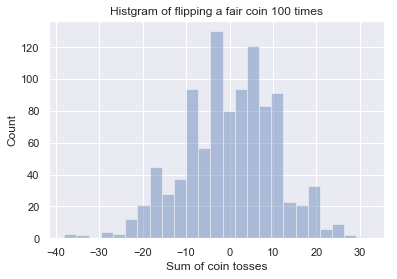

In [8]:
sns.distplot(sim_total, kde=False)
plt.title("Histgram of flipping a fair coin {} times".format(k))
plt.xlabel("Sum of coin tosses")
plt.ylabel("Count")
plt.show()

In [9]:
# Next, simulate 1000 coin tosses, 1000 times
k = 1000
sim_tosses, sim_total = flip_coin(1000, 1000)

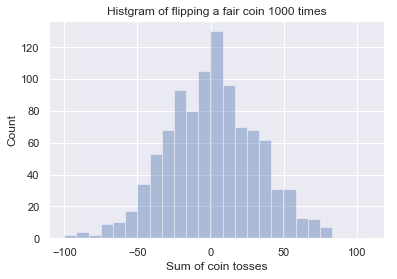

In [10]:
sns.distplot(sim_total, kde=False)
plt.title("Histgram of flipping a fair coin {} times".format(k))
plt.xlabel("Sum of coin tosses")
plt.ylabel("Count")
plt.show()

Using probability theory, we can determine the bounds of the sum of these coin tosses, namely, that the probability of $|S_k| \ge 4\sqrt{k}$ is smaller than $2x10^{-8}$.

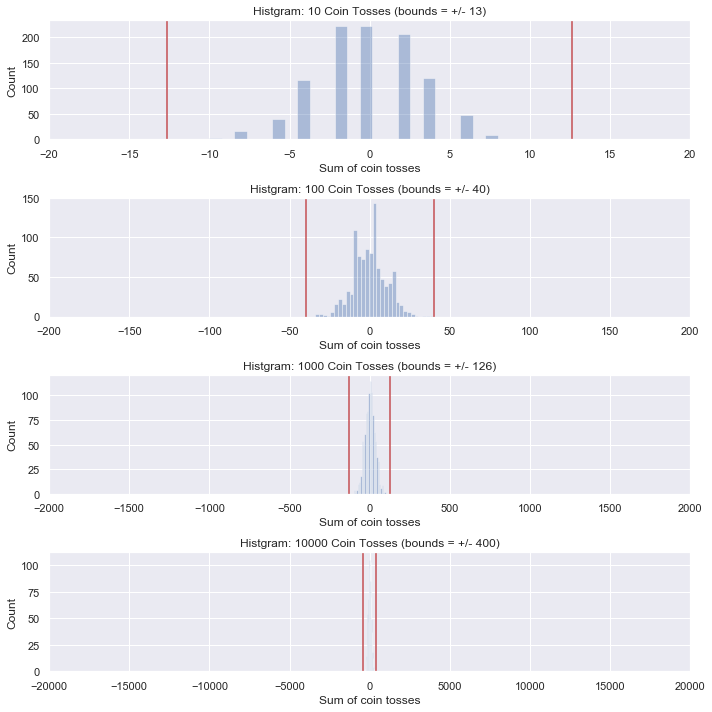

In [11]:
fig, ax = plt.subplots(4, 1, figsize=(10,10))

for i in range(1,5):
    k = 10**i
    sim_tosses, sim_total = flip_coin(k, 1000)
    bounds = 4 * np.sqrt(k)
    sns.distplot(sim_total, kde=False, ax=ax[i-1])
    ax[i-1].set_xlim([-k-1*k, k+1*k])
    ax[i-1].axvline(x=bounds, c='r')
    ax[i-1].axvline(x=-1*bounds, c='r')
    ax[i-1].set_title("Histgram: {} Coin Tosses (bounds = +/- {:.0f})".format(k, bounds))
    ax[i-1].set_xlabel("Sum of coin tosses")
    ax[i-1].set_ylabel("Count")
plt.tight_layout()

#### Summary

Coin toss experiments were simulated using ```numpy```, with heads and tails assigned values, $x_h = 1$ and $x_t = -1$, each occuring with an equal probability of $1/2$. The sum of $k$ coin tosses, $S_k = x_1 + x_2 + ... + x_k$, converges around zero and is almost always within the range $[-4\sqrt{k}, +4\sqrt{k}]$.


## Statistics

Statistics allows us to infer the properties of underlying events given data that was generated by a stochastic process. For example, we can use statistics to decide whether a coin is biased given that we have gotten 570 heads out of 1000 total coin flips. The thinking goes like this:

* Assume we have an unbiased coin
* Using probability theory, determine the probability of getting 570 heads (430 tails)
* If the probability is very small, within a threshold, we can reject with confidence the hypothesis that the coin is fair

This means we draw conclusion about systems and signals by analyzing real-world data.

#### The 3 Card Problem

A card is drawn from a hat containing three cards:

* One with Red on both sides
* One with Blue on both sides
* One with Red on one side and Blue on the other

If the other side of the card has a different color, you win. Otherwise, I win.

This is a great example where intuition may lead you to believe that you have a 50:50 chance of winning. Why? If the face up card is red, then the other side is either red or blue. But wait....

When we run a monte carlo simulation, we observe something unexpected.

In [12]:
cards = ['bb', 'rr', 'br']
winners = []
n = 100

for i in range(n):
    card = np.random.randint(0, 3)
    # You win
    if cards[card] == 'br':
        winners.append(0)
    # I win
    else:
        winners.append(1)

my_score = np.sum(winners)
your_score = n - my_score
print("I win {} | You win {}".format(my_score, your_score))

I win 67 | You win 33


In fact, the two sides have the same color twice as often as they have different colors. As we see, you are twice as likely to lose as you are to win. 

#### Estimating the Probability of Heads

Estimate the probability that n flips of a fair coin result in between k1 to k2 heads (repeated for m trials).

In [13]:
def num_heads(m, n):
    flips = np.random.randint(0, 2, size=(m, n))
    return np.sum(flips, axis=1)

In [14]:
def estimate_probability(n, k1, k2, m):
    num = num_heads(m, n)
    result = num[(num >= k1) & (num < k2)]
    return len(result) / m

In [15]:
estimate_probability(100,45,55,1000)

0.655

## Sets

Sets are a collection of elements. They may be explicitly defined with specific items or more broadly defined using a category.

If an element x is in set A, we call it a member. This is denoted $x \in A$. An element not in A is denoted $y \not\in A$. You can also say the opposite, namely, that A contains x, $A \supseteq x$.

When dealing with sets, order and repetition do not matter.

**Special Sets**

* Empty set: $\varnothing$ - for all x, x is not a member of empty set ($\forall x, x\not\in\varnothing$)
* Universal set: $\Omega$ - for all x, x is a member of universal set ($\forall x, x\in\Omega$)

#### Defining a Set & Basic Properties

In Python, elements of a set must be immutable and hashable. Lists cannot be elements of a set.

In [16]:
set1 = {1, 2}
set2 = set({1, 2})

set1, set2

({1, 2}, {1, 2})

In [17]:
empty = set()

empty

set()

In [18]:
not empty

True

In [19]:
languages = set(["javascript", "python", "c"])

In [20]:
not languages

False

In [21]:
"python" in languages

True

In [22]:
"spanish" in languages

False

In [23]:
len(languages)

3

In [24]:
sorted(languages)

['c', 'javascript', 'python']

In [25]:
languages.remove("c")
languages

{'javascript', 'python'}

#### Common Sets


* $C$ = set of all complex numbers
* $R$ = set of all real numbers
* $I$ = set of all imaginary numbers
* $Q$ = set of all rational numbers
* $Z$ = set of all integers
* $N$ = set of all natural numbers (>= 0)
* 

We say that $N \in Z \in Q \in R \in C$ and $I \in C$.

#### Sets within Sets

* Specify a set within a universe: $N = \{x \in Z | x \ge 0\}$ or $P = \{x \in N | x > 0\}$
* Specify a solution to an equation: $\{x \in R | x^2 = 1\} = \{-1, 1\}$ or $\{x \in R | x^2 = -1\} = \varnothing$

#### Integer Intervals

* $\{m,...,n\} = \{i \in Z | m \le i \le n\} $
* By convention, $[n] = \{1,...n\}$

#### Real Intervals

* $[a,b] = \{x \in R | a \le x \le b\}$
* $[a,b) = \{x \in R | a \le x < b\}$
* $(a,b] = \{x \in R | a < x \le b\}$
* $(a,b) = \{x \in R | a < x < b\}$

#### Visualizing Sets

Number of common elements:


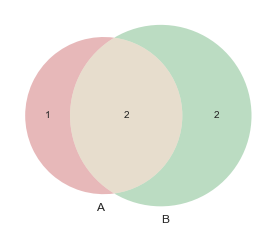

In [26]:
A = set({1, 2, 3})
B = set({1, 3, -1, 4})

print("Number of common elements:")
venn.venn2([A,B], set_labels=('A','B'))
plt.show()

#### Set Relations

* Equality: same elements in both sets
* Intersection: at least one element is shared between sets
* Disjoint: no elements are shared between sets
* Subset: all elements of one set are also in the other set
* Strict Subset: if all elements of one set are also in the other set and the sets are not equal ($\subset$)

#### Other Notation

* Relation between element and set, i.e. x in A: $x \in A$ 
* Relation between sets, i.e. A subset of B: $A \subset B$

In [27]:
zero = set({0})
a = set({0, 1})

zero.issubset(a)

True

In [28]:
a.issuperset(a)

True

In [29]:
zero < a # alternatively

True

#### Set Size

The size of a set $|A|$, also known as its cardinality, is equal to the number of elements in the set. The size of an integer interval $|\{m,...,n\}| = n-m+1$.

In general, $|A \cup B| = |A| + |B| - |A\cap B|$ - this is called the Principle of Inclusion-Exclusion. Note that for disjoint unions $|A\cap B| = 0$ and the size becomes a simple sum of the sizes of the two individual sets. In the case of three sets, $|A \cup B \cup C| = |A| + |B| + |C| - |A \cap B| - |A \cap C| - |B \cap C| + |A \cap B \cap C|$.

Another helpful identity is: $|\Omega| = |A| + |A^c|$. Sometimes it is easier to calculate the size of the complement and subtract it from the universal set to find the size of the set in question.

#### Set Operations

* Complement: all elements in universal set $\Omega$ that are not in A ($A^c$)
* Union: all elements in A, B or both ($A \cup B$)
* Intersection: all elements in both A and B ($A \cap B$)
* Difference: all elements in A that are not in B ($A - B$)
* Symmetric Difference: all elements in either set but not both sets ($A \Delta $B)

#### Helpful Identities

* De Morgan's Law: $(A \cup B)^c = A^c \cap B^c$ and $(A \cap B)^c = A^c \cup B^c$
* Involution: $(A^c)^c = A$

In [30]:
A = set([1, 2])
B = set([2, 3])
A | B, A.union(B) # 2 different notations for union

({1, 2, 3}, {1, 2, 3})

In [31]:
A & B, A.intersection(B) # 2 different notations for intersection

({2}, {2})

In [32]:
A - B, A.difference(B) # 2 different notations for difference

({1}, {1})

In [33]:
A ^ B, A.symmetric_difference(B) # 2 different notations for symmetric difference

({1, 3}, {1, 3})

In [34]:
A = {1, 2, 3, 4, 5}
B = {0, 2, -6, 5, 8, 9}
U = A|B|{7, 10} # create a universal set containing the union of A and B plus a few extra elements
U

{-6, 0, 1, 2, 3, 4, 5, 7, 8, 9, 10}

#### Finding the primes

In [35]:
k = 100
I = set(range(2,k))

for j in range(2, int(np.sqrt(k)) + 1):
    multiples = set(range(2*j, k, j))
    I -= multiples

print(I)

{2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97}


#### Tuples

When working with tuples, both order and repetition matter (unlike sets). Thus $(a, b, c) \ne (b, a, c)$ and $(b) \ne (b, b)$. A tuple with n elements is called an n-tuple; one special n-tuple is a two-element tuple called a 2-tuple or ordered pair: $(5, 7)$. Sequences are a shorthand version of tuples without the parentheses and commas.

#### Cartesian Products & Powers

The cartesian product $A \times B$ is the set of ordered pairs (tuples) consisting of elements in $A$ and $B$. This is denoted: $A \times B = \{(a,b): a\in A, b\in B\}$. The cartesian product of a set with itself is called a cartesian power, $A \times A \times A = A^n$. A special case is $A \times A$, or $A^2$, which is known as a cartesian square.

Using the cartesian product we construct our familiar n-dimension space, for example $R^2 = R \times R = \{(x,y): x,y\in R\}$, the Cartesian Plane. The cartesian product also defines shapes within this n-dimensional space, for example if $A = [0,2]$ and $B = [1,5]$, then $A \times B$ is a rectangle with sides $[0,2]$ in the x-direction and $[1,5]$ in the y-direction.

In general the size of a cartesian product is the product of the individual set sizes: $|A \times B \times C| = |A| \cdot |B| \cdot |C|$. Likewise, $|A^n| = |A|^n$.

Cartesian powers are important when dealing with binary strings or n-bit strings. Length-n binary strings are denoted as $\{0,1\}^n$:
* $\{0,1\}^0 = \varnothing$ - size 1
* $\{0,1\}^1 = 0, 1$ - size 2
* $\{0,1\}^2 = 00, 01, 10, 11$ - size 4
* $\{0,1\}^3 = 000, 001, 010, 100, 011, 101, 110, 111$ - size 8
* $\{0,1\}^n = 0...0, ..., 1...1$ - size $2^n$

Likewise, cartesian powers enable us to calculate the size of power sets, $P(S)$, which are the collection of all subsets of S. For example $|P(\{a,b\})| = \{0,1\}^{|2|}$ or more generally, $|P(S)| = \{0,1\}^{|S|}$.

In [36]:
# manually perform cartesian product
A = set(['w','v'])
B = set([3,2,0])

c = set()
for a in A:
    for b in B:
        c.add((b,a))

print(c)

{(2, 'w'), (3, 'w'), (0, 'w'), (0, 'v'), (3, 'v'), (2, 'v')}


In [37]:
for i in itertools.product(A,B):
    print(i)

('v', 0)
('v', 2)
('v', 3)
('w', 0)
('w', 2)
('w', 3)


In [38]:
# cartesian powers
print(set(itertools.product({1, 2, 3}, repeat=2)))

{(1, 2), (3, 2), (1, 3), (3, 3), (3, 1), (2, 1), (2, 3), (2, 2), (1, 1)}
